In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from collections import Counter

import venn as venn
%matplotlib inline

In [2]:
df = pd.read_csv('w2v_nonnorm_LLPS_PDB_RF.csv', sep='\t')
df = df[(df['Category'] == 'LLPS+') | (df['Category'] == 'LLPS-')]
df.index = df['Uniprot_ID']
df=df.drop(['Uniprot_ID', 'Category'], axis = 1)
df.columns = ['LLPS_PDB_RF']
df

,LLPS_PDB_RF
Uniprot_ID,
Q9UHD9,1.000
P04147,1.000
Q13151,1.000
P22626,1.000
P09651-1,1.000
...,...
P00873,0.065
P09651-2,0.050
P09651-2,0.050


In [3]:
df1 = pd.read_csv('w2v_nonnorm_LLPS_LLPS_RF.csv', sep='\t')
df1 = df1[(df1['Category'] == 'LLPS+') | (df1['Category'] == 'LLPS-')]
df1.index = df1['Uniprot_ID']
df1=df1.drop(['Uniprot_ID', 'Category'], axis = 1)
df1.columns = ['LLPS_LLPS_RF']
df1

,LLPS_LLPS_RF
Uniprot_ID,
P35637,1.000
P35637,1.000
P35637,1.000
P35637,1.000
P35637,0.995
...,...
B1MUE1,0.025
O60500,0.025
P09651-2,0.025


In [4]:
df2 = pd.read_csv('Phys_features_LLPS_PDB_RF.csv', sep='\t')
df2 = df2[(df2['Category'] == 'LLPS+') | (df2['Category'] == 'LLPS-')]
df2.index = df2['Uniprot_ID']
df2=df2.drop(['Uniprot_ID', 'Category'], axis = 1)
df2.columns = ['Phys_feat_LLPS_PDB_RF']
df2

,Phys_feat_LLPS_PDB_RF
Uniprot_ID,
Q92777,1.00
P35637,1.00
Q8WXF1,1.00
P35637,1.00
Q75E28,1.00
...,...
P10067,0.02
Q9TZQ3,0.01
O94752,0.00


In [5]:
df3 = pd.read_csv('Phys_features_LLPS_LLPS_RF.csv', '\t')
df3 = df3[(df3['Category'] == 'LLPS+') | (df3['Category'] == 'LLPS-')]
df3.index = df3['Uniprot_ID']
df3=df3.drop(['Category', 'Uniprot_ID'], axis = 1)
df3.columns = ['Phys_feat_LLPS_LLPS_RF']
df3

,Phys_feat_LLPS_LLPS_RF
Uniprot_ID,
P35637,1.0
P35637,1.0
P35637,1.0
D0PV95,1.0
O14979,1.0
...,...
P10067,0.0
B1MUE7,0.0
B1MUE8,0.0


In [43]:
llps=df.join(df1, how='outer')
llps

,LLPS_PDB_RF,LLPS_LLPS_RF
Uniprot_ID,,
A0A0G2UHG9,0.875,0.785
A0A0G2UMW8,0.810,0.815
A0A2K3DA85,0.930,0.225
B1MUE1,0.275,0.025
B1MUE4,0.180,0.030
...,...,...
Q9UHD9,0.450,0.080
Q9W4I7,0.840,0.110
Q9W4I7,0.840,0.095


In [40]:
result.index.unique()

Index(['Q9UHD9', 'P04147', 'Q13151', 'P22626', 'P09651-1', 'Q32P51', 'P35637',
       'P09651-2', 'Q9TZQ3', 'Q7ZXV8',
       ...
       'B1MUE7', 'P02945', 'P10067', 'B1MUE4', 'P42212', 'C5MKY7', 'P00698',
       'P07320', 'P16554', 'P00873'],
      dtype='object', name='Uniprot_ID', length=120)

In [6]:
exs = pd.read_excel('uniprot-filtered-organism__Homo+sapiens+(Human)+(9606)_+AND+review--.xlsx')
exs.index = exs['Entry']
exs = exs.drop(['Entry', 'Entry name', 'Protein names', 'Gene names', 'Status', 'Gene ontology (biological process)', 'Gene ontology (cellular component)', 'Gene ontology (molecular function)'], axis=1)
exs

,Sequence,Gene ontology (GO),Gene ontology IDs
Entry,,,
Q8N7X0,MASKQTKKKEVHRINSAHGSDKSKDFYPFGSNVQSGSTEQKKGKFP...,calcium-dependent cysteine-type endopeptidase ...,GO:0004198; GO:0019825; GO:0020037
Q5T1N1,MDEADFSEHTTYKQEDLPYDGDLSQIKIGNDYSFTSKKDGLEVLNQ...,"DNA-binding transcription activator activity, ...",GO:0000978; GO:0001228; GO:0001837
Q92667,MAIQFRSLFPLALPGMLALLGWWWFFSRKKGHVSSHDEQQVEAGAV...,cytosol [GO:0005829]; integral component of me...,GO:0003723; GO:0005739; GO:0005741; GO:0005829...
Q5VUY0,MWDLALIFLAAACVFSLGVTLWVICSHFFTVHIPAAVGHPVKLRVL...,integral component of membrane [GO:0016021]; c...,GO:0016021; GO:0016787; GO:0052689
P62736,MCEEEDSTALVCDNGSGLCKAGFAGDDAPRAVFPSIVGRPRHQGVM...,actin cytoskeleton [GO:0015629]; cell body [GO...,GO:0005524; GO:0005615; GO:0005737; GO:0005829...
...,...,...,...
Q8N895,MQKEMKMIKDEDVHFDLAVKKTPSFPHCLQPVASRGKAPQRHPFPE...,nucleus [GO:0005634]; DNA binding [GO:0003677]...,GO:0000122; GO:0003677; GO:0003714; GO:0005634...
Q9UK55,MKVVPSLLLSVLLAQVWLVPGLAPSPQSPETPAPQNQTSRVVQAPK...,endoplasmic reticulum lumen [GO:0005788]; extr...,GO:0004867; GO:0005615; GO:0005788; GO:0007596...
Q96MX3,MERAVEPWGPDLHRPEEREPQRGARTGLGSENVISQPNEFEHTPQE...,nucleus [GO:0005634]; DNA binding [GO:0003677]...,GO:0003677; GO:0005634; GO:0042802; GO:0046872


In [7]:
proteins = df.join(df1, how = 'outer')
proteins = proteins.join(df2, how = 'outer')
proteins = proteins.join(df3, how = 'outer')
proteins

,LLPS_PDB_RF,LLPS_LLPS_RF,Phys_feat_LLPS_PDB_RF,Phys_feat_LLPS_LLPS_RF
Uniprot_ID,,,,
A0A0G2UHG9,0.875,0.785,0.95,0.87
A0A0G2UMW8,0.810,0.815,0.85,0.85
A0A2K3DA85,0.930,0.225,0.99,0.23
B1MUE1,0.275,0.025,0.22,0.08
B1MUE4,0.180,0.030,0.04,0.02
...,...,...,...,...
Q9W4I7,0.770,0.110,0.89,0.10
Q9W4I7,0.770,0.095,0.91,0.12
Q9W4I7,0.770,0.095,0.91,0.10


In [47]:
proteins=proteins.groupby('Uniprot_ID').mean().reset_index()
proteins.index = proteins['Uniprot_ID']
proteins=proteins.drop(['Uniprot_ID'], axis = 1)

In [51]:
llps_list=proteins.index.to_list()
llps_list
with open("llps_list.txt", 'w') as f:
    for s in llps_list:
        f.write(str(s) + '\n') 

In [8]:
idx1 = proteins.index.unique()
idx2 = exs.index.unique()
a = idx2.intersection(idx1)
a

Index(['P17600', 'Q13151', 'Q92777', 'Q13148', 'P07320', 'P83916', 'P08908',
       'P31942', 'Q14103', 'Q01844', 'P24928', 'P04637', 'P01106', 'P10275',
       'P19622', 'Q9NSC5', 'Q01860', 'P55795', 'Q9H9S0', 'P06748', 'Q32P51',
       'Q8WXF1', 'P04156', 'P51991', 'Q15648', 'P33240', 'O14979', 'P48431',
       'P10276', 'P22626', 'O60500', 'P03372', 'Q9H0L4', 'O00571', 'Q06787',
       'Q13627', 'Q14781', 'P45973', 'Q9NQI0', 'P35637', 'P31483', 'Q9UHD9',
       'Q13501', 'O60885', 'P15502', 'Q01085', 'Q9UER7', 'O60563'],
      dtype='object')

In [9]:
exs=exs.loc[a]
exs


,Sequence,Gene ontology (GO),Gene ontology IDs
P17600,MNYLRRRLSDSNFMANLPNGYMTDLQRPQPPPPPPGAHSPGATPGP...,anchored component of synaptic vesicle membran...,GO:0000795; GO:0003779; GO:0005215; GO:0005524...
Q13151,MENSQLCKLFIGGLNVQTSESGLRGHFEAFGTLTDCVVVVNPQTKR...,nucleoplasm [GO:0005654]; nucleus [GO:0005634]...,GO:0000398; GO:0003723; GO:0003729; GO:0005634...
Q92777,MMNFLRRRLSDSSFIANLPNGYMTDLQRPEPQQPPPPPPPGPGAAS...,glutamatergic synapse [GO:0098978]; plasma mem...,GO:0005524; GO:0005886; GO:0007268; GO:0007269...
Q13148,MSEYIRVTEDENDEPIEIPSEDDGTVLLSTVTAQFPGACGLRYRNP...,cytoplasmic stress granule [GO:0010494]; inter...,GO:0000978; GO:0001933; GO:0003690; GO:0003723...
P07320,MGKITLYEDRGFQGRHYECSSDHPNLQPYLSRCNSARVDSGCWMLY...,cytoplasm [GO:0005737]; nucleus [GO:0005634]; ...,GO:0002088; GO:0005212; GO:0005634; GO:0005737...
P83916,MGKKQNKKKVEEVLEEEEEEYVVEKVLDRRVVKGKVEYLLKWKGFS...,"chromatin [GO:0000785]; chromosome, centromeri...",GO:0000775; GO:0000784; GO:0000785; GO:0003682...
P08908,MDVLSPGQGNNTTSPPAPFETGGNTTGISDVTVSYQVITSLLLGTL...,dendrite [GO:0030425]; integral component of p...,GO:0001662; GO:0004930; GO:0004993; GO:0005886...
P31942,MDWVMKHNGPNDASDGTVRLRGLPFGCSKEEIVQFFQGLEIVPNGI...,nucleoplasm [GO:0005654]; nucleus [GO:0005634]...,GO:0000398; GO:0003723; GO:0005634; GO:0005654...
Q14103,MSEEQFGGDGAAAAATAAVGGSAGEQEGAMVAATQGAAAAAGSGAG...,cytosol [GO:0005829]; nuclear chromatin [GO:00...,GO:0000398; GO:0000790; GO:0001889; GO:0003680...
Q01844,MASTDYSTYSQAAAQQGYSAYTAQPTQGYAQTTQAYGQQSYGTYGQ...,cytoplasm [GO:0005737]; nucleolus [GO:0005730]...,GO:0003712; GO:0003723; GO:0005516; GO:0005634...


In [10]:
gene_ontology = exs['Gene ontology (GO)'].tolist()
lst = [str(ontology).split(';') for ontology in gene_ontology]


In [11]:
flat_list = []
for sublist in lst:
    for item in sublist:
        flat_list.append(item)


In [12]:
flat_list = list(map(str.lstrip, flat_list))

In [13]:
flat_list1 =[]
for line in flat_list:
    line = line.split(' [')[0]
    flat_list1.append(line)

In [14]:
go_list = pd.Series(Counter(flat_list1))
go_df = go_list.to_frame()
go_df.columns = ['frequency']
go_df.index.name = 'gene ontology'
go_df['fraction of proteins'] = (go_df['frequency']/48)*100
head = go_df.nlargest(20,'frequency')
head
#head.to_csv('LLPS+-.csv')


,frequency,fraction of proteins
gene ontology,,
nucleoplasm,37,77.083333
nucleus,37,77.083333
cytoplasm,24,50.000000
RNA binding,22,45.833333
cytosol,19,39.583333
positive regulation of transcription by RNA polymerase II,16,33.333333
identical protein binding,15,31.250000
chromatin binding,14,29.166667
transcription factor binding,12,25.000000


In [15]:
go_df
go_df.to_csv('full_LLPS.csv')

Text(0.5, 1.0, 'gene ontology for training set')

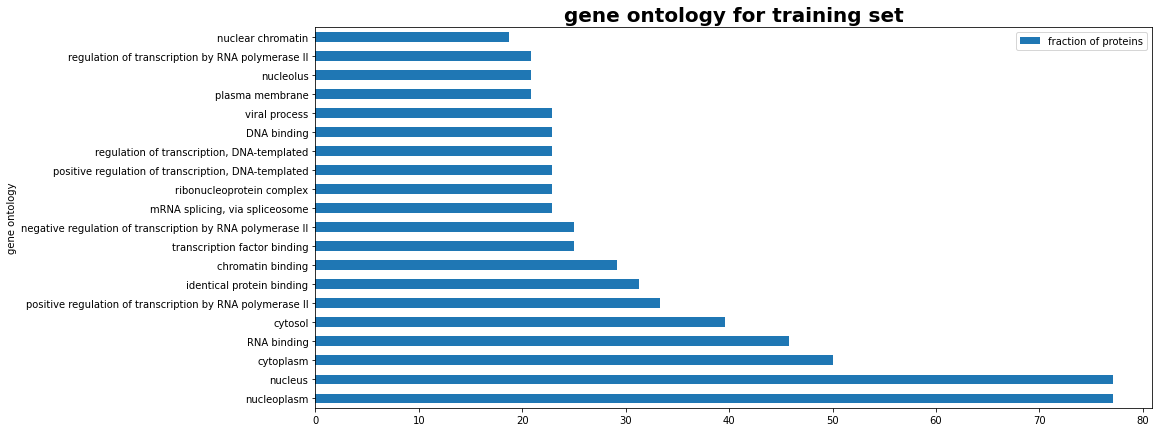

In [16]:
ax1 = head.plot.barh(y='fraction of proteins', align='center', figsize=(15,7))
plt.title('gene ontology for training set', fontsize=20, fontweight = 'bold')

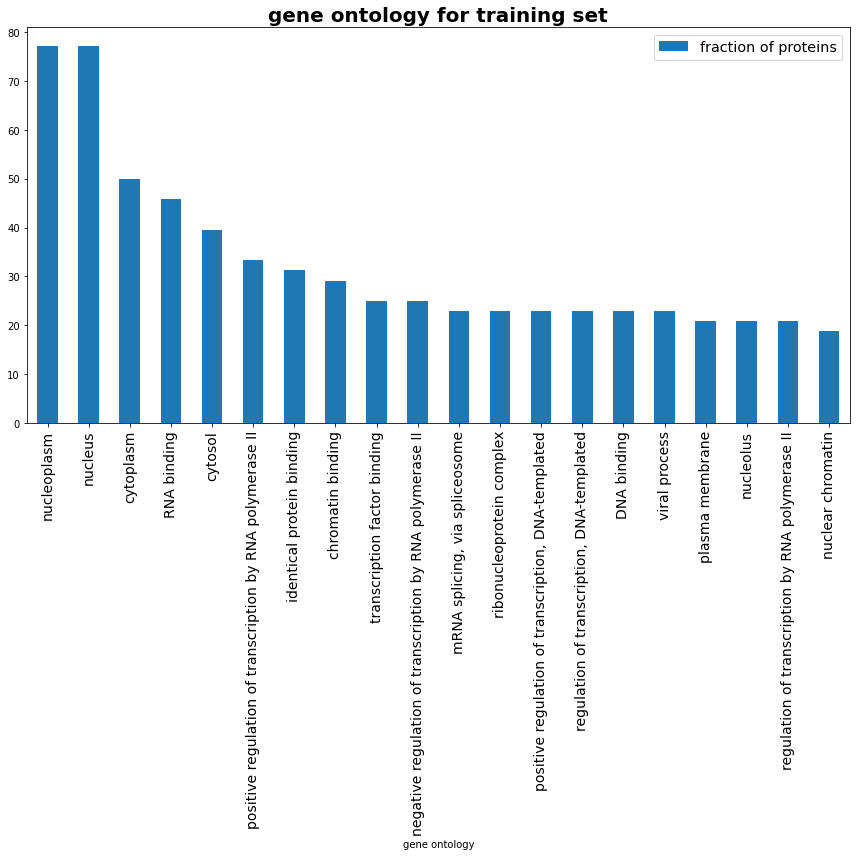

In [17]:
ax = head.plot(kind ='bar', y='fraction of proteins', rot= 90, figsize = (12,12))
plt.title('gene ontology for training set', fontsize=20, fontweight = 'bold')
plt.legend(fontsize=30) 
plt.legend(fontsize="x-large")
plt.xticks(fontsize=14)
plt.tight_layout() 

plt.savefig('llps.png', bbox_inches='tight', pad_inches = 0.0)

In [18]:
test_proteins = pd.read_csv('196 full.csv')
test_proteins.index = test_proteins['gene ontology']
test_proteins=test_proteins.drop(['gene ontology', 'frequency'], axis = 1)
test_proteins.columns = ['test']
test_proteins

,test
gene ontology,
actin cap,0.507614
actin cytoskeleton,0.507614
actin filament,1.522843
cytoplasmic vesicle,3.045685
cytosol,49.746193
...,...
PH domain binding,0.507614
snRNA catabolic process,0.507614
negative regulation of osteoclast differentiation,0.507614


Text(0.5, 1.0, 'gene ontology for test set')

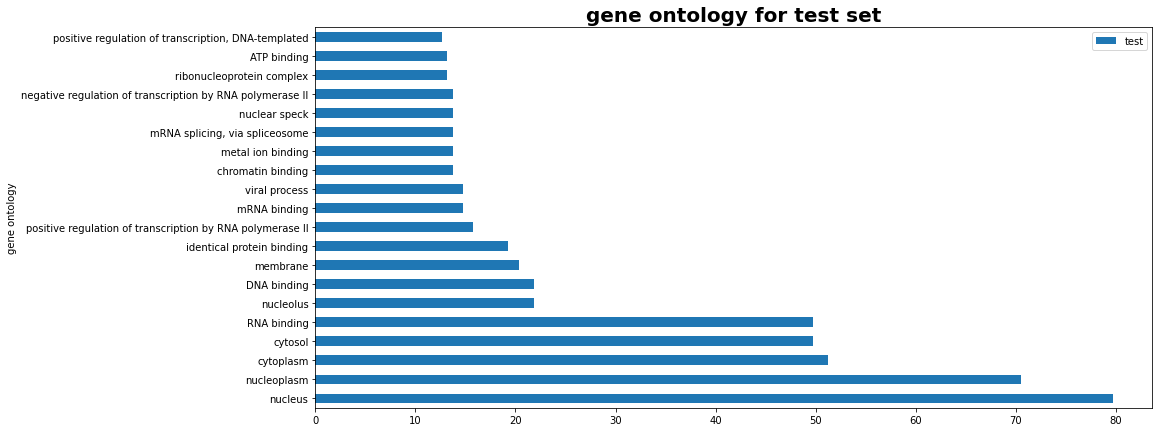

In [19]:
head1 = test_proteins.nlargest(20,'test')
ax2 = head1.plot.barh(y='test', align='center', figsize=(15,7))
plt.title('gene ontology for test set', fontsize=20, fontweight = 'bold')

In [20]:
train_proteins = pd.read_csv('full_LLPS.csv')
train_proteins.index = train_proteins['gene ontology']
train_proteins=train_proteins.drop(['gene ontology', 'frequency'], axis = 1)
train_proteins.columns = ['train']
train_proteins

,train
gene ontology,
anchored component of synaptic vesicle membrane,2.083333
axon,6.250000
cytoskeleton,4.166667
cytosol,39.583333
dendrite,14.583333
...,...
cell division,2.083333
negative regulation of mRNA polyadenylation,2.083333
positive regulation by host of viral transcription,2.083333


In [21]:
df6 = pd.concat([test_proteins, train_proteins], axis=1)
df6

,test,train
actin cap,0.507614,NaN
actin cytoskeleton,0.507614,2.083333
actin filament,1.522843,NaN
cytoplasmic vesicle,3.045685,2.083333
cytosol,49.746193,39.583333
...,...,...
activation of JUN kinase activity,NaN,2.083333
cellular response to diamide,NaN,2.083333
cyclin-dependent protein serine/threonine kinase activator activity,NaN,2.083333
cyclin-dependent protein serine/threonine kinase regulator activity,NaN,2.083333


In [22]:
prots = pd.read_csv('all_prot.csv')
prots.index = prots['gene ontology']
prots=prots.drop(['gene ontology', 'frequency'], axis = 1)
prots.columns = ['all proteins']


In [23]:
total = pd.concat([df6, prots], axis=1)
total['average'] = (total['train'] + total['test'])/2
total['ratio'] = total['average']/total['all proteins']
total = total[(total['average'] >= 5)] 
total= total.sort_values('ratio', ascending = False)
total
#total.to_csv('total sorted by ratio.csv')
#total.nlargest(20, ['train', 'ratio'])

,test,train,all proteins,average,ratio
mRNA 3'-UTR AU-rich region binding,2.538071,8.333333,0.127545,5.435702,42.617996
RNA metabolic process,5.583756,12.500000,0.225656,9.041878,40.069280
miRNA binding,2.538071,8.333333,0.147167,5.435702,36.935596
cytoplasmic stress granule,8.121827,10.416667,0.367918,9.269247,25.193813
mRNA 3'-UTR binding,6.598985,10.416667,0.358106,8.507826,23.757812
...,...,...,...,...,...
endoplasmic reticulum,4.568528,6.250000,5.038018,5.409264,1.073689
mitochondrion,6.598985,6.250000,6.176110,6.424492,1.040217
extracellular exosome,9.644670,10.416667,10.296787,10.030668,0.974155
metal ion binding,13.705584,6.250000,11.410351,9.977792,0.874451


In [24]:
df5 = pd.concat([test_proteins, train_proteins], axis=1)
df5 = df5.fillna(0)
df5['difference'] = df5['test']-df5['train']
df5 = df5.abs()
df5 = df5.sort_values(by='train', ascending = False)
#df5.to_csv('difference.csv')
 
df5['ratio'] = df5['test']/df5['train']
df5 = df5.sort_values(by = 'ratio', ascending = False)
df5 = df5[(df5['ratio']<=200)& (df5['ratio'] > 0.0)] 
df5
df5.nlargest(20, 'difference')

,test,train,difference,ratio
transcription factor binding,5.076142,25.000000,19.923858,0.203046
positive regulation of transcription by RNA polymerase II,15.736041,33.333333,17.597293,0.472081
chromatin binding,13.705584,29.166667,15.461083,0.469906
"regulation of transcription, DNA-templated",7.614213,22.916667,15.302453,0.332257
identical protein binding,19.289340,31.250000,11.960660,0.617259
regulation of transcription by RNA polymerase II,9.137056,20.833333,11.696277,0.438579
negative regulation of apoptotic process,5.076142,16.666667,11.590525,0.304569
negative regulation of transcription by RNA polymerase II,13.705584,25.000000,11.294416,0.548223
"positive regulation of transcription, DNA-templated",12.690355,22.916667,10.226311,0.553761
cytosol,49.746193,39.583333,10.162860,1.256746
